# Applying Classification Modeling
The goal of this week's assessment is to find the model which best predicts whether a person will default on their loan. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 

Dataset: The dataset comes customers default payments in Taiwan. More information about the dataset and columns are found in the link below.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#


You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

#### You will be working in pairs for this assessment; please have ONE notebook and be prepared to explain how you worked in your pair.
1. Clean up your data set so that you can do EDA. This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Create polynomial and/or interaction features. You must also create at least 2 new features that are not interactions or polynomial transformations. For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.
4. Perform some feature selction. This can happen beforehand using F-scores, or you can do it as part of your model building process by looking at the weights of your regularized logistic regression or feature importance of your decision tree.  
5. You must fit each of the three models to your data and tune at least 1 hyperparameter per model. 
6. After identifying the best hyperparameters for each model, fit those models to the test set and identify the best model overall using the evaluation metric of your choice.
7. Present your best model.

In [39]:
# import libraries

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## 1. Data Cleaning

In [2]:
df = pd.read_csv('clean_with_new_columns.csv')

In [3]:
df['default payment next month'].value_counts()

0.0    18678
1.0     5307
Name: default payment next month, dtype: int64

In [4]:
df.head()

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,amount_owed6,amount_owed5,amount_owed4,amount_owed3,amount_owed2,late_pay
0,0,350000.0,1.0,1.0,2.0,37.0,-2.0,-2.0,-2.0,-2.0,...,466.0,316.0,316.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,-12.0
1,1,50000.0,2.0,2.0,1.0,37.0,2.0,2.0,2.0,0.0,...,600.0,600.0,600.0,0.0,22.495000,22.113333,22.458621,inf,7.926182,6.0
2,2,50000.0,2.0,1.0,2.0,23.0,-1.0,-1.0,-1.0,-1.0,...,9810.0,660.0,2980.0,0.0,1.000000,1.000000,1.000000,0.990521,0.972527,-6.0
3,3,20000.0,1.0,3.0,1.0,56.0,0.0,0.0,0.0,0.0,...,0.0,490.0,658.0,0.0,27.930612,inf,12.351254,10.595395,8.074271,2.0
4,4,110000.0,2.0,2.0,2.0,32.0,0.0,0.0,0.0,0.0,...,4100.0,4100.0,4200.0,0.0,25.873659,26.965122,26.543659,20.085926,19.780000,0.0


In [5]:
df.rename(columns = {'PAY_0': 'PAY_1'}, inplace = True)

In [6]:
df.PAY_1.value_counts()

 0.0    11827
-1.0     4541
 1.0     2940
-2.0     2179
 2.0     2120
 3.0      265
 4.0       62
 5.0       23
 8.0       15
 7.0        7
 6.0        6
Name: PAY_1, dtype: int64

In [7]:
for i in df['EDUCATION']:
    if i == 5 or i == 6 or i == 0:
        df.EDUCATION.replace(i, 4, inplace=True)

In [8]:
df.PAY_1.value_counts()

 0.0    11827
-1.0     4541
 1.0     2940
-2.0     2179
 2.0     2120
 3.0      265
 4.0       62
 5.0       23
 8.0       15
 7.0        7
 6.0        6
Name: PAY_1, dtype: int64

(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

In [9]:
df.rename(columns = {'default payment next month': 'DEFAULT_PAY'}, inplace=True)

In [10]:
df['DEFAULT_PAY'].value_counts()

0.0    18678
1.0     5307
Name: DEFAULT_PAY, dtype: int64

In [11]:
df.AGE

0        37.0
1        37.0
2        23.0
3        56.0
4        32.0
         ... 
23980    24.0
23981    44.0
23982    26.0
23983    38.0
23984    34.0
Name: AGE, Length: 23985, dtype: float64

In [12]:
df.MARRIAGE.replace(0.0, 3.0, inplace=True)

In [13]:
df.MARRIAGE.value_counts()

2.0    12728
1.0    10952
3.0      305
Name: MARRIAGE, dtype: int64

## 2. EDA

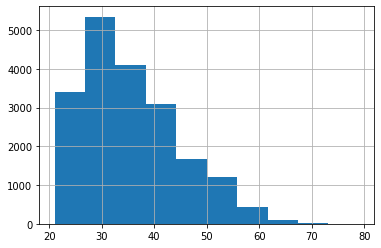

In [15]:
df.AGE.hist()

In [16]:
# Must be 21 to sign up for card

In [17]:
df.dtypes

Unnamed: 0        int64
LIMIT_BAL       float64
SEX             float64
EDUCATION       float64
MARRIAGE        float64
AGE             float64
PAY_1           float64
PAY_2           float64
PAY_3           float64
PAY_4           float64
PAY_5           float64
PAY_6           float64
BILL_AMT1       float64
BILL_AMT2       float64
BILL_AMT3       float64
BILL_AMT4       float64
BILL_AMT5       float64
BILL_AMT6       float64
PAY_AMT1        float64
PAY_AMT2        float64
PAY_AMT3        float64
PAY_AMT4        float64
PAY_AMT5        float64
PAY_AMT6        float64
DEFAULT_PAY     float64
amount_owed6    float64
amount_owed5    float64
amount_owed4    float64
amount_owed3    float64
amount_owed2    float64
late_pay        float64
dtype: object

In [18]:
df.shape

(19393, 31)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19393 entries, 0 to 23984
Data columns (total 31 columns):
Unnamed: 0      19393 non-null int64
LIMIT_BAL       19393 non-null float64
SEX             19393 non-null float64
EDUCATION       19393 non-null float64
MARRIAGE        19393 non-null float64
AGE             19393 non-null float64
PAY_1           19393 non-null float64
PAY_2           19393 non-null float64
PAY_3           19393 non-null float64
PAY_4           19393 non-null float64
PAY_5           19393 non-null float64
PAY_6           19393 non-null float64
BILL_AMT1       19393 non-null float64
BILL_AMT2       19393 non-null float64
BILL_AMT3       19393 non-null float64
BILL_AMT4       19393 non-null float64
BILL_AMT5       19393 non-null float64
BILL_AMT6       19393 non-null float64
PAY_AMT1        19393 non-null float64
PAY_AMT2        19393 non-null float64
PAY_AMT3        19393 non-null float64
PAY_AMT4        19393 non-null float64
PAY_AMT5        19393 non-null floa

In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,19393.0,12028.936678,6942.241711,0.0,6006.000000,12062.000000,18063.000000,23998.0
LIMIT_BAL,19393.0,165223.002114,131026.438622,10000.0,50000.000000,130000.000000,240000.000000,800000.0
SEX,19393.0,1.593255,0.491239,1.0,1.000000,2.000000,2.000000,2.0
EDUCATION,19393.0,1.861961,0.735681,1.0,1.000000,2.000000,2.000000,4.0
MARRIAGE,19393.0,1.560666,0.521648,1.0,1.000000,2.000000,2.000000,3.0
AGE,19393.0,35.438457,9.271557,21.0,28.000000,34.000000,41.000000,79.0
PAY_1,19393.0,0.072552,1.085669,-2.0,0.000000,0.000000,0.000000,8.0
PAY_2,19393.0,0.057443,1.127084,-2.0,0.000000,0.000000,0.000000,8.0
PAY_3,19393.0,0.051049,1.114603,-2.0,0.000000,0.000000,0.000000,8.0
PAY_4,19393.0,0.017996,1.085997,-2.0,0.000000,0.000000,0.000000,8.0


In [21]:
gender = df.groupby(['SEX', 'DEFAULT_PAY']).size().unstack(1)

In [22]:
gender

DEFAULT_PAY,0.0,1.0
SEX,,
1.0,5972,1916
2.0,9090,2415


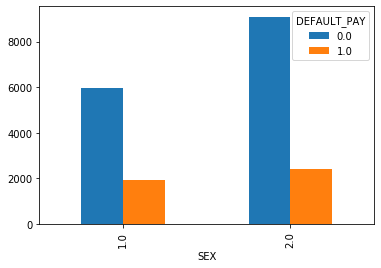

In [23]:
gender.plot(kind='bar')

In [24]:
gender['percent'] = (gender[1]/(gender[0] + gender[1])) 

In [25]:
gender

DEFAULT_PAY,0.0,1.0,percent
SEX,,,
1.0,5972,1916,0.242901
2.0,9090,2415,0.209909


In [26]:
gender.percent.mean()

0.22640467192586697

In [27]:
#regardless of gender 22% of all people will default

In [28]:
def corrl(Col1, Col2):
    res = df.groupby([Col1, Col2]).size().unstack()
    res['percent'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [29]:
corrl('EDUCATION', 'DEFAULT_PAY')

DEFAULT_PAY,0.0,1.0,percent
EDUCATION,,,
1.0,5285,1216,0.187048
2.0,7071,2267,0.242771
3.0,2453,831,0.253045
4.0,253,17,0.062963


In [30]:
# The amount of Education Decreases the percent of Default

In [31]:
corrl('MARRIAGE', 'DEFAULT_PAY')

DEFAULT_PAY,0.0,1.0,percent
MARRIAGE,,,
1.0,6695,2075,0.236602
2.0,8179,2194,0.211511
3.0,188,62,0.248000


In [32]:
#Single people have a lower chance of defaulting

In [33]:
corrl('AGE', 'DEFAULT_PAY').sort_values('AGE')

DEFAULT_PAY,0.0,1.0,percent
AGE,,,
21.0,23.0,4.0,0.148148
22.0,277.0,117.0,0.296954
23.0,458.0,163.0,0.262480
24.0,537.0,211.0,0.282086
25.0,576.0,194.0,0.251948
26.0,665.0,181.0,0.213948
27.0,765.0,208.0,0.213772
28.0,743.0,195.0,0.207889
29.0,832.0,197.0,0.191448


In [34]:
# possibly drop all values of senior citizens, since rate is not applicable

## 3. Feature Engineering

## 4. Feature Selection

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

In [35]:
X = df.drop('DEFAULT_PAY', axis=1)
y = df.DEFAULT_PAY

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input contains infinity or a value too large for dtype('float64').

In [ ]:
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

## 6. Model Evaluation

## 7. Final Model